In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [50]:
import numpy as np

In [5]:
sheet1 = pd.read_excel('E:/data analyst/ML/stones2milestones/assignment_data.xlsx', sheet_name = 'Interested Users') 
sheet1.head(3)

,Child name,phone,email_id,school,grade,batch_preferred,source,Submitted At
0,CH_30001,911100221000,s2m_test_20001@tests2m.com,St.paul's school,Grade 2,"Afternoon Batch (4:00 - 4:45 PM), Evening Batc...",lastchance,2020-04-16 08:46:39
1,CH_30002,911100221001,s2m_test_20002@tests2m.com,K L E School haveri,Grade 4,"Evening Batch (6:15 - 7:00 PM), Morning Batch ...",lastchance,2020-04-16 08:47:55
2,CH_30003,911100221002,s2m_test_20003@tests2m.com,Delhu Public School Howrah,Grade 2,"Morning Batch (11:15 - 12:00 PM), Evening Batc...",lastchance,2020-04-16 08:47:59


In [6]:
sheet = []

sheet.append(sheet1)
sheet2 = pd.read_excel('E:/data analyst/ML/stones2milestones/assignment_data.xlsx', sheet_name = 'Booked Users')
sheet.append(sheet2)

sheet3 = pd.read_excel('E:/data analyst/ML/stones2milestones/assignment_data.xlsx', sheet_name = 'Trainers')
sheet.append(sheet3)

sheet4 = pd.read_excel('E:/data analyst/ML/stones2milestones/assignment_data.xlsx', sheet_name = 'Subscription Bought') 
sheet.append(sheet4)

### 5. Sales conversion w.r.t Grade

In [7]:
sheet4.isna().sum()

Child Name               78
Registered Number         4
Registered Email ID      21
Payment date              0
Sale by                 160
Grade                    19
Pricing                   0
Duration                 42
Sessions preferred      180
Live session details    201
dtype: int64

In [8]:
sheet4.count()

Child Name              340
Registered Number       414
Registered Email ID     397
Payment date            418
Sale by                 258
Grade                   399
Pricing                 418
Duration                376
Sessions preferred      238
Live session details    217
dtype: int64

In [9]:
sheet4.dtypes

Child Name               object
Registered Number       float64
Registered Email ID      object
Payment date             object
Sale by                  object
Grade                    object
Pricing                  object
Duration                 object
Sessions preferred       object
Live session details     object
dtype: object

In [10]:
# multichild = sheet4['Pricing'].apply(lambda x: fail if x == 'MultiChild' else Pass)
# multichild

sheet4['Pricing'].str[0:3] == 'Multichild'

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Pricing, Length: 418, dtype: bool

In [11]:
"Find Pricing equals to Multichild "

child = sheet4[sheet4['Pricing'].str[0:3] == 'Mul']
child

,Child Name,Registered Number,Registered Email ID,Payment date,Sale by,Grade,Pricing,Duration,Sessions preferred,Live session details
104,CH_31902,9.111002e+11,s2m_test_21946@tests2m.com,27-03-2020 12:00:00 AM,SP_1006,4,Multichild,8G,NaN,Live - Upsell (Larger plan)
352,CH_30835,9.111002e+11,s2m_test_20829@tests2m.com,22-04-2020 2:39:45 PM,SP_1012,4,Multichild,NaN,Assigned,Live - Upsell (Larger plan)
363,CH_32013,9.111002e+11,s2m_test_21022@tests2m.com,23-04-2020 5:49:24 PM,SP_1005,5,Multichild,10G+1yr,Assigned,NaN
398,CH_31412,NaN,s2m_test_20670@tests2m.com,26-04-2020 12:00:00 AM,SP_1001,NaN,Multichild,12G + 1yr,Assigned,NaN
406,CH_32077,9.111002e+11,s2m_test_21083@tests2m.com,2020-04-27 00:00:00,SP_1009,3,Multichild,12G+1tr +assesment,Assigned,NaN


In [12]:
"identify and remove it"
sheet4[sheet4['Pricing'] == '95381 45678']


,Child Name,Registered Number,Registered Email ID,Payment date,Sale by,Grade,Pricing,Duration,Sessions preferred,Live session details
250,CH_32008,9.111002e+11,s2m_test_22088@tests2m.com,2020-12-04 15:03:17,SP_1001,1,95381 45678,12G + 1y,SCJ/13042020/Batch 3,Live - Upsell (Larger plan)


In [13]:
# reset value of sheet4 without including multichild value

sheet4 = sheet4[sheet4['Pricing'].str[0:3] != 'Mul']

sheet4.head(3)


,Child Name,Registered Number,Registered Email ID,Payment date,Sale by,Grade,Pricing,Duration,Sessions preferred,Live session details
0,CH_31846,9.111002e+11,s2m_test_21890@tests2m.com,16-03-2020 12:00:00 AM,SP_1001,2,199,0.5,NaN,NaN
1,CH_31847,9.111002e+11,NaN,16-03-2020 12:00:00 AM,SP_1002,4,199,0.5,NaN,NaN
2,CH_31848,9.111002e+11,s2m_test_21891@tests2m.com,16-03-2020 12:00:00 AM,NaN,4,199,0.5,NaN,NaN


In [14]:
sheet4 = sheet4[sheet4['Pricing']!= '95381 45678']
sheet4.head(3)

,Child Name,Registered Number,Registered Email ID,Payment date,Sale by,Grade,Pricing,Duration,Sessions preferred,Live session details
0,CH_31846,9.111002e+11,s2m_test_21890@tests2m.com,16-03-2020 12:00:00 AM,SP_1001,2,199,0.5,NaN,NaN
1,CH_31847,9.111002e+11,NaN,16-03-2020 12:00:00 AM,SP_1002,4,199,0.5,NaN,NaN
2,CH_31848,9.111002e+11,s2m_test_21891@tests2m.com,16-03-2020 12:00:00 AM,NaN,4,199,0.5,NaN,NaN


In [15]:
sheet4.count()

Child Name              334
Registered Number       409
Registered Email ID     391
Payment date            412
Sale by                 252
Grade                   394
Pricing                 412
Duration                371
Sessions preferred      233
Live session details    214
dtype: int64

##### Changing Data Type

In [17]:
"changing dat` type of pricing"
sheet4['Pricing']=sheet4['Pricing'].astype('int32')
sheet4.dtypes

Child Name               object
Registered Number       float64
Registered Email ID      object
Payment date             object
Sale by                  object
Grade                    object
Pricing                   int32
Duration                 object
Sessions preferred       object
Live session details     object
dtype: object

In [18]:
"pricing value should be more than 499"

sheet4['sales'] = sheet4['Pricing'].apply(lambda x: True if x >= 499 else False)

sheet4[sheet4['sales']==True].count()


Child Name              259
Registered Number       267
Registered Email ID     250
Payment date            270
Sale by                 249
Grade                   259
Pricing                 270
Duration                263
Sessions preferred      231
Live session details    214
sales                   270
dtype: int64

In [19]:
table4 = sheet4[sheet4['sales']==True]

table4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 12 to 417
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Child Name            259 non-null    object 
 1   Registered Number     267 non-null    float64
 2   Registered Email ID   250 non-null    object 
 3   Payment date          270 non-null    object 
 4   Sale by               249 non-null    object 
 5   Grade                 259 non-null    object 
 6   Pricing               270 non-null    int32  
 7   Duration              263 non-null    object 
 8   Sessions preferred    231 non-null    object 
 9   Live session details  214 non-null    object 
 10  sales                 270 non-null    bool   
dtypes: bool(1), float64(1), int32(1), object(8)
memory usage: 22.4+ KB


In [20]:
"the data is modified in place, which means it will return nothing and the dataframe is now updated"

table4.drop(columns = ['Live session details','Duration','Sessions preferred','Sale by'],inplace = True)
table4.head(3)

c:\users\amit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Child Name,Registered Number,Registered Email ID,Payment date,Grade,Pricing,sales
12,CH_31858,9.111002e+11,s2m_test_21900@tests2m.com,18-03-2020 12:00:00 AM,2,999,True
15,CH_31860,9.111002e+11,s2m_test_21903@tests2m.com,18-03-2020 12:00:00 AM,4,1999,True
23,CH_31868,9.111002e+11,s2m_test_21911@tests2m.com,19-03-2020 12:00:00 AM,1,1999,True


In [21]:
"checking unique values"
table4['Child Name'].is_unique

False

In [181]:
gb = table4.groupby('Grade').count()
gb

,Child Name,Registered Number,Registered Email ID,Payment date,Pricing,sales
Grade,,,,,,
1,41,43,40,43,43,43
2,62,64,57,64,64,64
3,65,66,60,66,66,66
4,79,77,75,79,79,79
5,4,4,4,4,4,4
6,1,1,1,1,1,1
Kg,1,1,1,1,1,1
Nursery,1,1,1,1,1,1


In [187]:
gb.index
gb.sales

Grade
1          43
2          64
3          66
4          79
5           4
6           1
Kg          1
Nursery     1
Name: sales, dtype: int64

## 4. Sales conversion with respect to Source

In [22]:
"checking duplicate index of sheet1"
sheet1.index.is_unique

"copying data of sheet1 into table1"
table1  = pd.DataFrame(sheet1)
print(sheet1.shape,table1.shape)

table1.drop_duplicates(subset= "Child name",inplace= True,keep = 'first')
"reseting index"
table1=table1.reset_index(drop =True)
print(table1.shape)
table1.head(3)

(1683, 8) (1683, 8)
(1439, 8)


,Child name,phone,email_id,school,grade,batch_preferred,source,Submitted At
0,CH_30001,911100221000,s2m_test_20001@tests2m.com,St.paul's school,Grade 2,"Afternoon Batch (4:00 - 4:45 PM), Evening Batc...",lastchance,2020-04-16 08:46:39
1,CH_30002,911100221001,s2m_test_20002@tests2m.com,K L E School haveri,Grade 4,"Evening Batch (6:15 - 7:00 PM), Morning Batch ...",lastchance,2020-04-16 08:47:55
2,CH_30003,911100221002,s2m_test_20003@tests2m.com,Delhu Public School Howrah,Grade 2,"Morning Batch (11:15 - 12:00 PM), Evening Batc...",lastchance,2020-04-16 08:47:59


In [23]:
"reset index of table4"

table4.reset_index(drop=True)
"check index duplicate"
print(table4.index.is_unique)
"drop duplicate in child column"
table4.drop_duplicates(subset = 'Child Name',inplace = True)

table4.shape

True


c:\users\amit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


(250, 7)

In [24]:
sh1 = table1.set_index('Child name')

#sheet1.groupby('source').count()
sh1.index.is_unique

True

### functions

In [25]:
def find_na(df):
    return dict({'Total of': df.count(),'Na value of': df.isna().sum()})
   
    

In [42]:
from dateutil import parser

def convert_to_dt(s):
    try:
        return parser.parse(s)
    except Exception:
        return np.nan

In [26]:
find_na(sheet1)

{'Total of': Child name         1683
 phone              1683
 email_id           1683
 school             1683
 grade              1683
 batch_preferred    1683
 source             1681
 Submitted At       1683
 dtype: int64,
 'Na value of': Child name         0
 phone              0
 email_id           0
 school             0
 grade              0
 batch_preferred    0
 source             2
 Submitted At       0
 dtype: int64}

In [27]:
# sheet1['Child name'].unique()
# "find repeated value"
# import collections

sh4=table4.set_index('Child Name')

print(sh4.index.is_unique)
sh4.head(3)

True


,Registered Number,Registered Email ID,Payment date,Grade,Pricing,sales
Child Name,,,,,,
CH_31858,9.111002e+11,s2m_test_21900@tests2m.com,18-03-2020 12:00:00 AM,2,999,True
CH_31860,9.111002e+11,s2m_test_21903@tests2m.com,18-03-2020 12:00:00 AM,4,1999,True
CH_31868,9.111002e+11,s2m_test_21911@tests2m.com,19-03-2020 12:00:00 AM,1,1999,True


In [28]:
print(sh1.shape,sh4.shape)


(1439, 7) (250, 6)


In [29]:
"check for duplicate values"
def check_duplicate(df):
    
    say = df.index.is_unique

    length = len(df.index.unique())
    shape = df.shape
    return print("is unique {},lenth of unique index {},total shape {}".format(say,length,shape))

"Remve duplicate values"
def drop_duplicate(df):
    
    return df.drop_duplicates(inplace=True)
    


In [31]:
# check_duplicate(sh1)
# check_duplicate(sh4)

# drop_duplicate(sh1)
# drop_duplicate(sh4)

"joining sh1 and sh4"
#sh1sh4 = pd.concat([sh1, sh4], axis=1, join='inner',copy =True)
sh1sh4 = pd.concat([sh1, sh4], axis=1).reindex(sh4.index)
sh1sh4.head(3)


is unique True,lenth of unique index 1439,total shape (1439, 7)
is unique True,lenth of unique index 250,total shape (250, 6)


,phone,email_id,school,grade,batch_preferred,source,Submitted At,Registered Number,Registered Email ID,Payment date,Grade,Pricing,sales
Child Name,,,,,,,,,,,,,
CH_31858,NaN,NaN,NaN,NaN,NaN,NaN,NaT,9.111002e+11,s2m_test_21900@tests2m.com,18-03-2020 12:00:00 AM,2,999.0,True
CH_31860,NaN,NaN,NaN,NaN,NaN,NaN,NaT,9.111002e+11,s2m_test_21903@tests2m.com,18-03-2020 12:00:00 AM,4,1999.0,True
CH_31868,NaN,NaN,NaN,NaN,NaN,NaN,NaT,9.111002e+11,s2m_test_21911@tests2m.com,19-03-2020 12:00:00 AM,1,1999.0,True


In [32]:
print(sh1sh4.shape)
"replace Nan valu with Unknown Source"
print(sh1sh4['source'].isna().sum())
sh1sh4['source']=sh1sh4['source'].fillna('unknown')
sh1sh4['source']

(250, 13)
199


Child Name
CH_31858    unknown
CH_31860    unknown
CH_31868    unknown
CH_31872    unknown
CH_31876    unknown
             ...   
CH_32080    unknown
CH_32081    unknown
CH_32082    unknown
CH_31831    unknown
CH_32083    unknown
Name: source, Length: 250, dtype: object

In [509]:
gb4=sh1sh4.groupby(sh1sh4.source).count()
gb4.sum()

phone                   51
email_id                51
school                  51
grade                   51
batch_preferred         51
Submitted At            51
Registered Number      247
Registered Email ID    230
Payment date           250
Grade                  247
Pricing                250
sales                  250
dtype: int64

In [510]:
gb4.sales

source
T1KRMSMS        4
TEB11SMS        5
TEB12SMS        3
TEB2ASMS        2
TEB3SMS         2
TEB4SMS         5
TEB5SMS         3
adarsh          1
b1rmsms         5
b2rmsms         1
lastchance      2
nlusms          1
ntfpush         4
ntfuiuser       2
rfmsms         11
unknown       199
Name: sales, dtype: int64

### 7. Time slot – attendance %

In [33]:
"copying sheet2 to table2"
table2 = pd.DataFrame(sheet2)
"droping unwanted table"
table2=table2.drop(columns=['Invitee UUID',' School','Facilitator UUID','Parent Email','Phone','Grade'])
table2.head(3)

,Batch,Enrolment Type,Child Name,Opted Start Time,Opted Start Date,Attendance
0,"fREADom Trial Class - Grades 1, 2 [I] 11:15am ...",Trial,CH_31440,16-04-2020 11:15:00,"11:15am - Thursday, April 16, 2020",Present
1,"fREADom Trial Class - Grades 1, 2 [I] 11:15am ...",Trial,CH_31441,16-04-2020 11:15:00,"11:15am - Thursday, April 16, 2020",Present
2,"fREADom Trial Class - Grades 1, 2 [I] 11:15am ...",Trial,CH_31442,16-04-2020 11:15:00,"11:15am - Thursday, April 16, 2020",Absent


In [34]:
table2['Batch'].dtype

dtype('O')

In [35]:
table2['Batch']=table2['Batch'].astype(str)
table2['Batch'].dtype

dtype('O')

In [36]:
"removing freedom from columns"
table2['Batch'] = table2['Batch'].str.strip('fREADom')

"removing class from columns"
# table2['Batch']=table2['Batch'].str.strip('Class')
# table2['Batch'][2]

new =table2['Batch'].str.split(pat =']',expand = True)



In [37]:
"creating new column grade from splitted row"
table2['Grades'] = new[0]
"Droping old column "
table2=table2.drop(columns='Batch')



In [38]:
new1 = table2['Grades'].str.split(pat ='[',expand = True)

table2['Tier']=new[1]
table2['Grade']=new[0]



In [39]:
"dropping extra column"
table2=table2.drop(columns='Grades')
table2=table2.drop(columns='Tier')

In [41]:
new2= table2['Grade'].str.split(pat = '[',expand = True)
table2['trial']=new2[1]
#table2=table2.drop(columns=['Grade','tier'])
table2['Grades']=new2[0]
new3=table2['Grades'].str.split(pat='-',expand =True)
table2['Grade']=new3[1]
table2=table2.drop(columns='Grades')
table2.head(3)

,Enrolment Type,Child Name,Opted Start Time,Opted Start Date,Attendance,Grade,trial
0,Trial,CH_31440,16-04-2020 11:15:00,"11:15am - Thursday, April 16, 2020",Present,"Grades 1, 2",I
1,Trial,CH_31441,16-04-2020 11:15:00,"11:15am - Thursday, April 16, 2020",Present,"Grades 1, 2",I
2,Trial,CH_31442,16-04-2020 11:15:00,"11:15am - Thursday, April 16, 2020",Absent,"Grades 1, 2",I


In [43]:
table2['Opted Start Time']=table2['Opted Start Time'].apply(convert_to_dt)
table2

,Enrolment Type,Child Name,Opted Start Time,Opted Start Date,Attendance,Grade,trial
0,Trial,CH_31440,2020-04-16 11:15:00,"11:15am - Thursday, April 16, 2020",Present,"Grades 1, 2",I
1,Trial,CH_31441,2020-04-16 11:15:00,"11:15am - Thursday, April 16, 2020",Present,"Grades 1, 2",I
2,Trial,CH_31442,2020-04-16 11:15:00,"11:15am - Thursday, April 16, 2020",Absent,"Grades 1, 2",I
3,Trial,CH_31443,2020-04-16 11:15:00,"11:15am - Thursday, April 16, 2020",Absent,"Grades 3, 4",I
4,Trial,CH_31444,2020-04-16 11:15:00,"11:15am - Thursday, April 16, 2020",Present,"Grades 3, 4",I
...,...,...,...,...,...,...,...
1706,Trial,CH_31382,2020-04-27 18:00:00,"06:00pm - Monday, April 27, 2020",NaN,"Grades 1,2",III
1707,Trial,CH_31347,2020-04-27 18:00:00,"06:00pm - Monday, April 27, 2020",NaN,"Grades 1,2",III
1708,Trial,CH_31346,2020-04-27 18:00:00,"06:00pm - Monday, April 27, 2020",NaN,"Grades 1,2",III
1709,Trial,CH_31315,2020-04-27 18:00:00,"06:00pm - Monday, April 27, 2020",NaN,"Grades 1,2",III


In [44]:
"drop unnecessary columns"
#table2=table2.drop(columns=['Enrolment Type','Opted Start Date'])
table2.head(3)

,Child Name,Opted Start Time,Attendance,Grade,trial
0,CH_31440,2020-04-16 11:15:00,Present,"Grades 1, 2",I
1,CH_31441,2020-04-16 11:15:00,Present,"Grades 1, 2",I
2,CH_31442,2020-04-16 11:15:00,Absent,"Grades 1, 2",I


In [45]:
table2['present'] = table2['Attendance'].apply(lambda x: True if x =='Present' else False)
table2



,Child Name,Opted Start Time,Attendance,Grade,trial,present
0,CH_31440,2020-04-16 11:15:00,Present,"Grades 1, 2",I,True
1,CH_31441,2020-04-16 11:15:00,Present,"Grades 1, 2",I,True
2,CH_31442,2020-04-16 11:15:00,Absent,"Grades 1, 2",I,False
3,CH_31443,2020-04-16 11:15:00,Absent,"Grades 3, 4",I,False
4,CH_31444,2020-04-16 11:15:00,Present,"Grades 3, 4",I,True
...,...,...,...,...,...,...
1706,CH_31382,2020-04-27 18:00:00,NaN,"Grades 1,2",III,False
1707,CH_31347,2020-04-27 18:00:00,NaN,"Grades 1,2",III,False
1708,CH_31346,2020-04-27 18:00:00,NaN,"Grades 1,2",III,False
1709,CH_31315,2020-04-27 18:00:00,NaN,"Grades 1,2",III,False


In [318]:
gb22 =table2.groupby(['Opted Start Time','present']).count()

gb22.head(4)

Child Name  Attendance  Batch  Grade
Opted Start Time    present                                      
2020-04-16 11:15:00 False            18          17     18     18
                    True             20          20     20     20
2020-04-16 16:00:00 False            10          10     10     10
                    True             31          31     31     31

In [717]:
gb22.Attendance

Opted Start Time     present
2020-04-16 11:15:00  False      17
                     True       20
2020-04-16 16:00:00  False      10
                     True       31
2020-04-16 18:15:00  False      27
                     True       38
2020-04-17 11:15:00  False      11
                     True       13
2020-04-17 16:00:00  False      19
                     True       22
2020-04-17 18:15:00  False      16
                     True       38
2020-04-18 11:15:00  False      25
                     True       29
2020-04-18 16:00:00  False      35
                     True       29
2020-04-18 18:15:00  False      17
                     True       42
2020-04-19 11:15:00  False      23
                     True       45
2020-04-19 16:00:00  False      19
                     True       44
2020-04-19 18:15:00  False      21
                     True       31
2020-04-20 11:45:00  False      40
                     True       38
2020-04-20 18:00:00  False      41
                     True 

In [47]:
"checking Trainer Name"
sheet3[sheet3['Trainer Name'].str[0:3]=='CAN']

"removing Cancelled"
table3 = sheet3[sheet3['Trainer Name'].str[0:3]!='CAN']
table3


,Trainer Name,Date,Timing,Grade,Batch size,Batch count,Batch,Topics
0,FAC_5001,16 April Thursday,11.15 am - 12 noon,"Grade 1,2",group,9.0,trial I,Rocking with rhymes
1,FAC_5002,16 April Thursday,11.15 am - 12 noon,"Grade 3,4",group,9.0,trial I,In my mind's eye
2,FAC_5003,16 April Thursday,11.15 am - 12 noon,"Grade 1,2",group,9.0,trial II,Word Whiz
3,FAC_5006,16 April Thursday,11.15 am - 12 noon,"Grade 3,4",group,7.0,trial II,Rocking with rhymes
4,FAC_5007,16 April Thursday,4:00-4:45 pm,"Grade 3,4",group,9.0,trial I,In my head or real
...,...,...,...,...,...,...,...,...
169,FAC_5009,27 April Monday,6.00 pm - 6.45 pm,"Grade 3,4",NaN,NaN,Trial IV,Emotional energy
170,FAC_5040,27 April Monday,6.00 pm - 6.45 pm,"Grade 1,2",NaN,NaN,Trial IV,In my mind's eye
171,FAC_5038,27 April Monday,6.00 pm - 6.45 pm,"Grade 3,4",NaN,NaN,Trial II,Play with Punctuation
172,FAC_5002,27 April Monday,6.00 pm - 6.45 pm,"Grade 1,2",NaN,NaN,Trial II,Word Whiz


In [132]:
# new_table3 = pd.DataFrame(table3[['Date','Timing']])

# # a.to_frame().join(b
# abc =new_table3['Date'].to_frame().join(new_table3['Timing'])
# # new_table3
# abc
# new_table3
table3['Time']=table3['Date'] +str(" ")+ table3['Timing']
table3.tail(3)


c:\users\amit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Trainer Name,Date,Timing,Grade,Batch size,Batch count,Batch,Topics,Time,Time slot
171,FAC_5038,27 April Monday,6.00 pm - 6.45 pm,"Grade 3,4",NaN,NaN,Trial II,Play with Punctuation,27 April Monday 6.00 pm - 6.45 pm,None
172,FAC_5002,27 April Monday,6.00 pm - 6.45 pm,"Grade 1,2",NaN,NaN,Trial II,Word Whiz,27 April Monday 6.00 pm - 6.45 pm,None
173,FAC_5022,27 April Monday,6.00 pm - 6.45 pm,"Grade 1,2",NaN,NaN,Trial III,Rocking with rhymes,27 April Monday 6.00 pm - 6.45 pm,None


In [147]:
from datetime import datetime

def time_convert(a):
    
    try:
        
        date= datetime.strptime(a, '%d %B %A %I.%M %p')

        date = date.replace(2020)
        return date
    except:
        
        return parser.parse(a)

    



In [148]:

nw1=table3['Time'].str.split(pat='-',expand = True)
table3['Time slot']=nw1[0]
table3['Time slot']=table3['Time slot'].str.rstrip(' ')
table3['Time slot']=table3['Time slot'].apply(time_convert)


table3.head(2)


,Trainer Name,Date,Timing,Grade,Batch size,Batch count,Batch,Topics,Time,Time slot
0,FAC_5001,16 April Thursday,11.15 am - 12 noon,"Grade 1,2",group,9.0,trial I,Rocking with rhymes,16 April Thursday 11.15 am - 12 noon,2020-04-16 11:15:00
1,FAC_5002,16 April Thursday,11.15 am - 12 noon,"Grade 3,4",group,9.0,trial I,In my mind's eye,16 April Thursday 11.15 am - 12 noon,2020-04-16 11:15:00


### Sales conversion with respect to Trainers

In [90]:
# table2['Grade']=table2['Grade'].str.strip('Grades ')
table2.head(2)

,Child Name,Opted Start Time,Attendance,Grade,trial,present
0,CH_31440,2020-04-16 11:15:00,Present,"1, 2",I,True
1,CH_31441,2020-04-16 11:15:00,Present,"1, 2",I,True


In [152]:
# t3 = pd.DataFrame(table3)
# t3=t3.drop(columns=['Time','Batch count','Timing','Batch size '])
t3.tail(2)

,Trainer Name,Date,Grade,Batch,Topics,Time slot
172,FAC_5002,27 April Monday,"Grade 1,2",Trial II,Word Whiz,2020-04-27 18:00:00
173,FAC_5022,27 April Monday,"Grade 1,2",Trial III,Rocking with rhymes,2020-04-27 18:00:00


In [155]:
"rename columns"

# t3.rename(columns={'Time slot':'Opted Start Time'},inplace= True)
# table2.rename(columns={'trial':'Batch'},inplace=True)  

In [169]:
#t3['Grade']=t3['Grade'].str.strip('Grade ')

#t3['Batch']=t3['Batch'].str.strip('Trial')
"strip white space"
t3['Batch']=t3['Batch'].str.strip(' ')

In [171]:
t3.head(3)

,Trainer Name,Date,Grade,Batch,Topics,Opted Start Time
0,FAC_5001,16 April Thursday,"1,2",I,Rocking with rhymes,2020-04-16 11:15:00
1,FAC_5002,16 April Thursday,"3,4",I,In my mind's eye,2020-04-16 11:15:00
2,FAC_5003,16 April Thursday,"1,2",II,Word Whiz,2020-04-16 11:15:00


In [215]:
table2.head(3)

,Child Name,Opted Start Time,Attendance,Grade,Batch,present
0,CH_31440,2020-04-16 11:15:00,Present,"1, 2",I,True
1,CH_31441,2020-04-16 11:15:00,Present,"1, 2",I,True
2,CH_31442,2020-04-16 11:15:00,Absent,"1, 2",I,False


In [239]:
exp1=table2['Grade'].str.split(',',expand=True)
df1=pd.DataFrame()
df1['first']=exp1[0]
df1['second']=exp1[1]
df1['second']=df1['second'].str.strip(' ')
table2['Grades']=df1['first']+','+df1['second']

table2.head(3)

,Child Name,Opted Start Time,Attendance,Grade,Batch,present,Grades
0,CH_31440,2020-04-16 11:15:00,Present,"1, 2",I,True,"1,2"
1,CH_31441,2020-04-16 11:15:00,Present,"1, 2",I,True,"1,2"
2,CH_31442,2020-04-16 11:15:00,Absent,"1, 2",I,False,"1,2"


In [243]:
#table2=table2.drop(columns='Grade')
table2.rename(columns={'Grades':'Grade'},inplace=True)
table2.head(3)

,Child Name,Opted Start Time,Attendance,Batch,present,Grade
0,CH_31440,2020-04-16 11:15:00,Present,I,True,"1,2"
1,CH_31441,2020-04-16 11:15:00,Present,I,True,"1,2"
2,CH_31442,2020-04-16 11:15:00,Absent,I,False,"1,2"


In [244]:
mi2=table2.set_index(['Opted Start Time','Batch','Grade'])
mi3=t3.set_index(['Opted Start Time','Batch','Grade'])

In [248]:
"joining sheet2 and sheet3"
mi2mi3=mi2.join(mi3,how='outer')
mi2mi3

Child Name Attendance present Trainer Name  \
Opted Start Time    Batch Grade                                              
2004-04-25 00:00:00 I     1,2          NaN        NaN     NaN     FAC_5049   
                          3,4          NaN        NaN     NaN     FAC_5008   
2020-04-16 04:00:00 I     1,2          NaN        NaN     NaN     FAC_5009   
                          3,4          NaN        NaN     NaN     FAC_5007   
                    II    1,2          NaN        NaN     NaN     FAC_5011   
...                                    ...        ...     ...          ...   
2020-04-27 18:00:00 III   1,2     CH_31346        NaN   False     FAC_5022   
                          1,2     CH_31315        NaN   False     FAC_5022   
                          1,2     CH_31402        NaN   False     FAC_5022   
                    IV    1,2          NaN        NaN     NaN     FAC_5040   
                          3,4          NaN        NaN     NaN     FAC_5009   

                                              Date               Topics  
Opted Start Time    Batch Grade                                          
2004-04-25 00:00:00 I     1,2    25 April Saturday            Word Whiz  
                          3,4    25 April Saturday   Making Connections  
2020-04-16 04:00:00 I     1,2    16 April Thursday            word whiz  
                          3,4    16 April Thursday   In my head or real  
                    II    1,2    16 April Thursday  Rocking with rhymes  
...                                            ...                  ...  
2020-04-27 18:00:00 III   1,2      27 April Monday  Rocking with rhymes  
                          1,2      27 April Monday  Rocking with rhymes  
                          1,2      27 April Monday  Rocking with rhymes  
                    IV    1,2      27 April Monday     In my mind's eye  
                          3,4      27 April Monday     Emotional energy  

[1776 rows x 6 columns]

In [250]:
final=mi2mi3.reset_index()
final

,Opted Start Time,Batch,Grade,Child Name,Attendance,present,Trainer Name,Date,Topics
0,2004-04-25 00:00:00,I,"1,2",NaN,NaN,NaN,FAC_5049,25 April Saturday,Word Whiz
1,2004-04-25 00:00:00,I,"3,4",NaN,NaN,NaN,FAC_5008,25 April Saturday,Making Connections
2,2020-04-16 04:00:00,I,"1,2",NaN,NaN,NaN,FAC_5009,16 April Thursday,word whiz
3,2020-04-16 04:00:00,I,"3,4",NaN,NaN,NaN,FAC_5007,16 April Thursday,In my head or real
4,2020-04-16 04:00:00,II,"1,2",NaN,NaN,NaN,FAC_5011,16 April Thursday,Rocking with rhymes
...,...,...,...,...,...,...,...,...,...
1771,2020-04-27 18:00:00,III,"1,2",CH_31346,NaN,False,FAC_5022,27 April Monday,Rocking with rhymes
1772,2020-04-27 18:00:00,III,"1,2",CH_31315,NaN,False,FAC_5022,27 April Monday,Rocking with rhymes
1773,2020-04-27 18:00:00,III,"1,2",CH_31402,NaN,False,FAC_5022,27 April Monday,Rocking with rhymes
1774,2020-04-27 18:00:00,IV,"1,2",NaN,NaN,NaN,FAC_5040,27 April Monday,In my mind's eye


In [253]:
"removing null value and storing it"
full_final=final[~final['Child Name'].isna()]
full_final

,Opted Start Time,Batch,Grade,Child Name,Attendance,present,Trainer Name,Date,Topics
12,2020-04-16 11:15:00,I,"1,2",CH_31440,Present,True,FAC_5001,16 April Thursday,Rocking with rhymes
13,2020-04-16 11:15:00,I,"1,2",CH_31441,Present,True,FAC_5001,16 April Thursday,Rocking with rhymes
14,2020-04-16 11:15:00,I,"1,2",CH_31442,Absent,False,FAC_5001,16 April Thursday,Rocking with rhymes
15,2020-04-16 11:15:00,I,"1,2",CH_31446,Present,True,FAC_5001,16 April Thursday,Rocking with rhymes
16,2020-04-16 11:15:00,I,"1,2",CH_31459,Present,True,FAC_5001,16 April Thursday,Rocking with rhymes
...,...,...,...,...,...,...,...,...,...
1769,2020-04-27 18:00:00,III,"1,2",CH_31382,NaN,False,FAC_5022,27 April Monday,Rocking with rhymes
1770,2020-04-27 18:00:00,III,"1,2",CH_31347,NaN,False,FAC_5022,27 April Monday,Rocking with rhymes
1771,2020-04-27 18:00:00,III,"1,2",CH_31346,NaN,False,FAC_5022,27 April Monday,Rocking with rhymes
1772,2020-04-27 18:00:00,III,"1,2",CH_31315,NaN,False,FAC_5022,27 April Monday,Rocking with rhymes


In [255]:
full_final=full_final.set_index('Child Name')
full_final

,Opted Start Time,Batch,Grade,Attendance,present,Trainer Name,Date,Topics
Child Name,,,,,,,,
CH_31440,2020-04-16 11:15:00,I,"1,2",Present,True,FAC_5001,16 April Thursday,Rocking with rhymes
CH_31441,2020-04-16 11:15:00,I,"1,2",Present,True,FAC_5001,16 April Thursday,Rocking with rhymes
CH_31442,2020-04-16 11:15:00,I,"1,2",Absent,False,FAC_5001,16 April Thursday,Rocking with rhymes
CH_31446,2020-04-16 11:15:00,I,"1,2",Present,True,FAC_5001,16 April Thursday,Rocking with rhymes
CH_31459,2020-04-16 11:15:00,I,"1,2",Present,True,FAC_5001,16 April Thursday,Rocking with rhymes
...,...,...,...,...,...,...,...,...
CH_31382,2020-04-27 18:00:00,III,"1,2",NaN,False,FAC_5022,27 April Monday,Rocking with rhymes
CH_31347,2020-04-27 18:00:00,III,"1,2",NaN,False,FAC_5022,27 April Monday,Rocking with rhymes
CH_31346,2020-04-27 18:00:00,III,"1,2",NaN,False,FAC_5022,27 April Monday,Rocking with rhymes


In [260]:
"sheet4 formated values"
sh4.head(3)
sh4=sh4.drop(columns='Grade')
sh4

,Registered Number,Registered Email ID,Payment date,Pricing,sales
Child Name,,,,,
CH_31858,9.111002e+11,s2m_test_21900@tests2m.com,18-03-2020 12:00:00 AM,999,True
CH_31860,9.111002e+11,s2m_test_21903@tests2m.com,18-03-2020 12:00:00 AM,1999,True
CH_31868,9.111002e+11,s2m_test_21911@tests2m.com,19-03-2020 12:00:00 AM,1999,True
CH_31872,9.111002e+11,s2m_test_21915@tests2m.com,19-03-2020 12:00:00 AM,1999,True
CH_31876,9.111002e+11,s2m_test_21919@tests2m.com,20-03-2020 12:00:00 AM,999,True
...,...,...,...,...,...
CH_32080,9.111002e+11,s2m_test_22160@tests2m.com,2020-04-27 00:00:00,1999,True
CH_32081,9.111002e+11,s2m_test_22161@tests2m.com,2020-04-27 00:00:00,1999,True
CH_32082,9.111002e+11,s2m_test_22162@tests2m.com,2020-04-27 00:00:00,1999,True


In [261]:
super_final=sh4.join(full_final,how='inner')
super_final

,Registered Number,Registered Email ID,Payment date,Pricing,sales,Opted Start Time,Batch,Grade,Attendance,present,Trainer Name,Date,Topics
Child Name,,,,,,,,,,,,,
CH_30004,9.111002e+11,NaN,18-04-2020 2:40:19 PM,1999,True,2020-04-17 18:15:00,I,"1,2",Present,True,NaN,NaN,NaN
CH_30013,9.111002e+11,s2m_test_20144@tests2m.com,19-04-2020 6:24:00 PM,1999,True,2020-04-17 18:15:00,I,"3,4",Present,True,NaN,NaN,NaN
CH_30028,9.111002e+11,s2m_test_22086@tests2m.com,2020-12-04 12:59:47,1999,True,2020-04-17 18:15:00,I,"1,2",Present,True,NaN,NaN,NaN
CH_30028,9.111002e+11,s2m_test_22086@tests2m.com,2020-12-04 12:59:47,1999,True,2020-04-19 16:00:00,III,"1,2",Present,True,NaN,NaN,NaN
CH_30040,9.111002e+11,s2m_test_22060@tests2m.com,2020-08-04 17:01:20,999,True,2020-04-16 18:15:00,II,"3,4",Present,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
CH_31748,9.111002e+11,s2m_test_21791@tests2m.com,23-04-2020 12:00:00 AM,1999,True,2020-04-23 18:00:00,IV,"3,4",Present,False,FAC_5041,23 April Thursday,Rocking with Rhymes
CH_31801,9.111002e+11,s2m_test_21845@tests2m.com,25-04-2020 5:44:09 PM,1999,True,2020-04-25 11:45:00,I,"3,4",Present,True,FAC_5046,25 April Saturday,Elements of a Story
CH_31803,9.111002e+11,s2m_test_22152@tests2m.com,25-04-2020 1:12:54 PM,1999,True,2020-04-25 11:45:00,I,"3,4",Present,True,FAC_5046,25 April Saturday,Elements of a Story


In [264]:

super_final=super_final.drop(columns=['Registered Number','Registered Email ID'])
super_final.head(3)




,Payment date,Pricing,sales,Opted Start Time,Batch,Grade,Attendance,present,Trainer Name,Date,Topics
Child Name,,,,,,,,,,,
CH_30004,18-04-2020 2:40:19 PM,1999,True,2020-04-17 18:15:00,I,"1,2",Present,True,NaN,NaN,NaN
CH_30013,19-04-2020 6:24:00 PM,1999,True,2020-04-17 18:15:00,I,"3,4",Present,True,NaN,NaN,NaN
CH_30028,2020-12-04 12:59:47,1999,True,2020-04-17 18:15:00,I,"1,2",Present,True,NaN,NaN,NaN


### 1.Sales conversion with respect to Trainers

In [ ]:
"making index a column"
Q1=super_final.reset_index()
gb1=Q1.groupby('Trainer Name').count()
gb1.head(3)

### 2. Sales conversion with respect to Time slot

In [275]:
gb2=Q1.groupby('Opted Start Time').count()
gb2

,Child Name,Payment date,Pricing,sales,Batch,Grade,Attendance,present,Trainer Name,Date,Topics
Opted Start Time,,,,,,,,,,,
2020-04-16 11:15:00,1,1,1,1,1,1,1,1,1,1,1
2020-04-16 16:00:00,4,4,4,4,4,4,4,4,0,0,0
2020-04-16 18:15:00,6,6,6,6,6,6,6,6,0,0,0
2020-04-17 11:15:00,3,3,3,3,3,3,3,3,3,3,3
2020-04-17 16:00:00,1,1,1,1,1,1,1,1,0,0,0
2020-04-17 18:15:00,8,8,8,8,8,8,8,8,0,0,0
2020-04-18 11:15:00,5,5,5,5,5,5,4,5,4,5,5
2020-04-18 16:00:00,5,5,5,5,5,5,5,5,0,0,0
2020-04-18 18:15:00,3,3,3,3,3,3,3,3,0,0,0


### 3. Sales conversion with respect to Topic

In [276]:
gb3=Q1.groupby('Topics').count()
gb3

,Child Name,Payment date,Pricing,sales,Opted Start Time,Batch,Grade,Attendance,present,Trainer Name,Date
Topics,,,,,,,,,,,
Category Spin,5,5,5,5,5,5,5,5,5,5,5
Elements of a Story,2,2,2,2,2,2,2,2,2,2,2
In my head or real?,4,4,4,4,4,4,4,4,4,4,4
In my mind's eye,4,4,4,4,4,4,4,4,4,4,4
Making connections,4,4,4,4,4,4,4,4,4,4,4
Meet the magic 'e',2,2,2,2,2,2,2,2,2,2,2
Name it,6,6,6,6,6,6,6,6,6,6,6
Name it,3,3,3,3,3,3,3,3,3,3,3
Rocking with Rhymes,4,4,4,4,4,4,4,4,4,4,4


### 6. Time taken for Sales conversion

In [324]:
Q6 = sh1.join(sh4,how='inner')
Q6.head(3)

,phone,email_id,school,grade,batch_preferred,source,Submitted At,Registered Number,Registered Email ID,Payment date,Pricing,sales
CH_30004,911100221003,s2m_test_20004@tests2m.com,Bharathi vidya bhavans,Grade 2,"Evening Batch (6:15 - 7:00 PM), Afternoon Batc...",lastchance,2020-04-16 08:48:27,9.111002e+11,NaN,18-04-2020 2:40:19 PM,1999,True
CH_30013,911100221013,s2m_test_20014@tests2m.com,TGFS Kashipur,Grade 3,"Afternoon Batch (4:00 - 4:45 PM), Evening Batc...",lastchance,2020-04-16 09:03:23,9.111002e+11,s2m_test_20144@tests2m.com,19-04-2020 6:24:00 PM,1999,True
CH_30028,911100221028,s2m_test_20029@tests2m.com,Skps,Grade 2,"Morning Batch (11:15 - 12:00 PM), Evening Batc...",TEB12SMS,2020-04-16 10:36:28,9.111002e+11,s2m_test_22086@tests2m.com,2020-12-04 12:59:47,1999,True


In [325]:
Q6['Payment date']=pd.to_datetime(Q6['Payment date'])

In [326]:
Q6['Submitted At']=pd.to_datetime(Q6['Submitted At'])

In [305]:
Q6.dtypes

phone                           int64
email_id                       object
school                         object
grade                          object
batch_preferred                object
source                         object
Submitted At           datetime64[ns]
Registered Number             float64
Registered Email ID            object
Payment date           datetime64[ns]
Pricing                         int32
sales                            bool
dtype: object

In [312]:
ans=pd.DataFrame()
ans['Submitted At']= Q7['Submitted At'] 
ans['Payment date'] = Q7['Payment date']

In [315]:
ans['diff'] = (Q6['Payment date'] - Q6['Submitted At']).astype('timedelta64[h]')

In [ ]:
### Question no 6 Answer

In [316]:
ans

,Submitted At,Payment date,diff
CH_30004,2020-04-16 08:48:27,2020-04-18 14:40:19,53.0
CH_30013,2020-04-16 09:03:23,2020-04-19 18:24:00,81.0
CH_30028,2020-04-16 10:36:28,2020-12-04 12:59:47,5570.0
CH_30040,2020-04-16 10:38:17,2020-08-04 17:01:20,2646.0
CH_30054,2020-04-16 10:41:33,2020-04-23 09:52:04,167.0
CH_30094,2020-04-16 11:39:21,2020-04-19 19:25:37,79.0
CH_30115,2020-04-16 12:52:12,2020-04-19 21:29:37,80.0
CH_30126,2020-04-16 13:41:02,2020-03-27 00:00:00,-494.0
CH_30144,2020-04-16 14:18:26,2020-12-04 01:22:58,5555.0
CH_30146,2020-04-16 14:20:15,2020-04-19 22:57:00,80.0


## Data Visualization

### 5. Sales Conversion w.r.t Grade

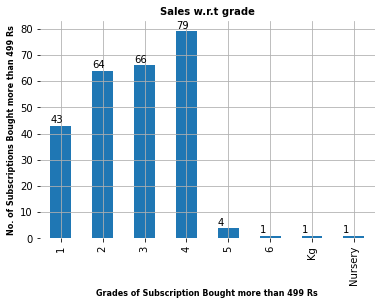

In [269]:
ax=gb['sales'].plot(kind='bar')

plt.title("Sales w.r.t grade",fontweight = 'bold',fontsize = 10)

plt.xlabel("Grades of Subscription Bought more than 499 Rs",fontweight = 'bold',fontsize =8)
plt.ylabel("No. of Subscriptions Bought more than 499 Rs",fontweight = 'bold',fontsize = 8)

"remove border of graph"
for spine in plt.gca().spines.values():
    spine.set_visible(False)

"add value on top of bar"
for p in ax.patches:
    
    width,height = p.get_width(),p.get_height()
    #print(width,height)
    x,y = p.get_xy()
    ax.annotate('{}'.format(height),(x,y+height+1))
    

plt.grid()
plt.show()

### 4. Sales conversion with respect to Source

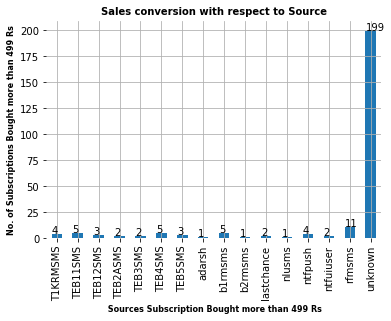

In [511]:
ax= gb4['sales'].plot(kind='bar')

plt.title("Sales conversion with respect to Source",fontweight = 'bold',fontsize = 10)

plt.xlabel(" Sources Subscription Bought more than 499 Rs",fontweight = 'bold',fontsize =8)
plt.ylabel("No. of Subscriptions Bought more than 499 Rs",fontweight = 'bold',fontsize = 8)

"remove border of graph"
for spine in plt.gca().spines.values():
    spine.set_visible(False)

"add value on top of bar"
for p in ax.patches:
    
    width,height = p.get_width(),p.get_height()
    #print(width,height)
    x,y = p.get_xy()
    ax.annotate('{}'.format(height),(x,y+height+0.1))
    

plt.grid()
plt.show()

 Unknown are those sources which are not mention in interested User but they have bought sibscription 

### 7. Time slot – attendance 

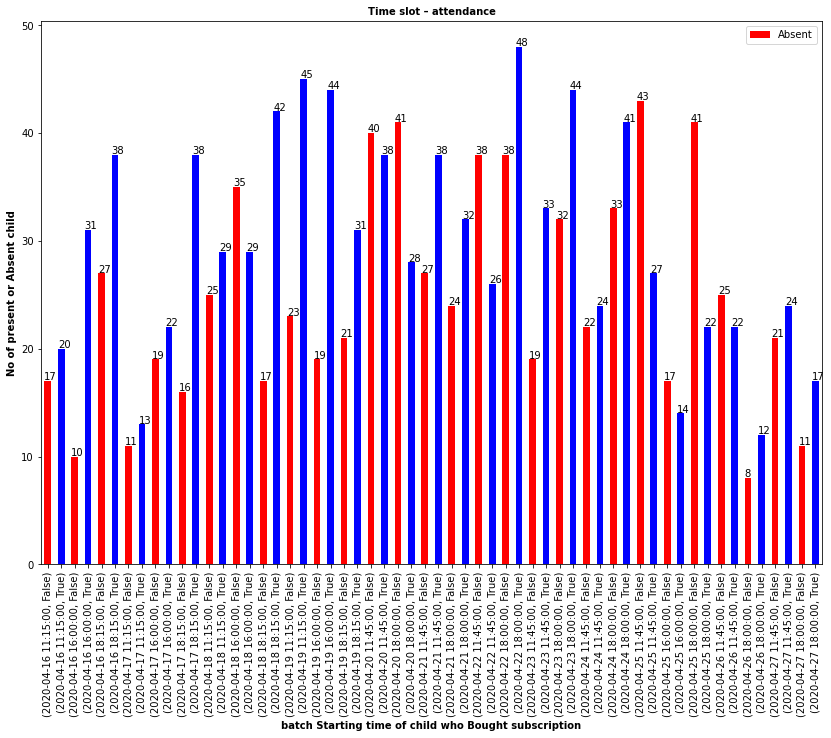

In [322]:
plt.figure(figsize=(14,10))

ax=gb22['Attendance'].plot(kind='bar',color=['red','blue'],label='Absent')


plt.title("Time slot – attendance",fontweight = 'bold',fontsize = 10)

plt.ylabel("No of present or Absent child",fontweight = 'bold',fontsize =10)
plt.xlabel("batch Starting time of child who Bought subscription",fontweight = 'bold',fontsize = 10)

for p in ax.patches:
    
    width,height = p.get_width(),p.get_height()
    #print(width,height)
    x,y = p.get_xy()
    ax.annotate('{}'.format(height),(x,y+height+0.1))
    

ax.legend()

plt.show()

### 1.Sales conversion with respect to Trainers

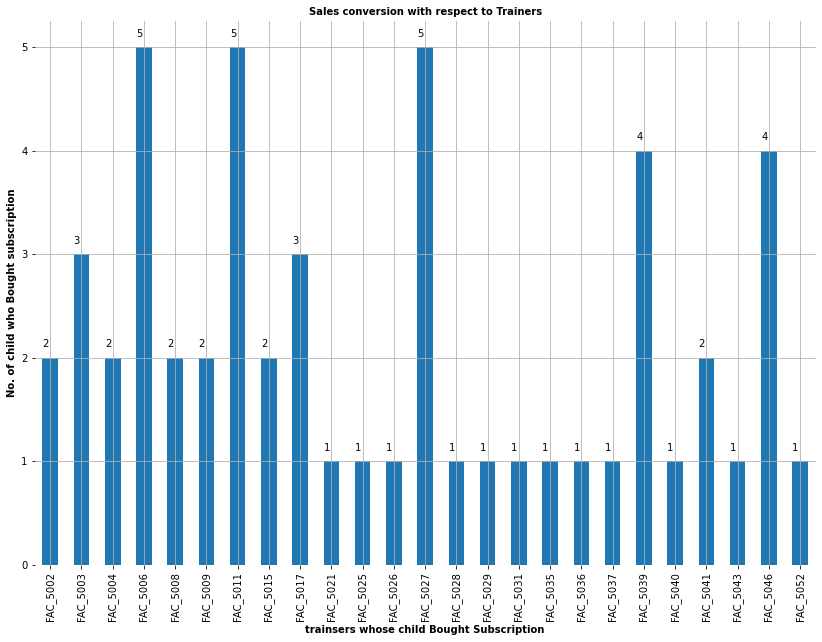

In [271]:
plt.figure(figsize=(14,10))
ax1= gb1['sales'].plot(kind='bar')

plt.title("Sales conversion with respect to Trainers",fontweight = 'bold',fontsize = 10)

plt.xlabel("trainsers whose child Bought Subscription",fontweight = 'bold',fontsize =10)
plt.ylabel("No. of child who Bought subscription",fontweight = 'bold',fontsize = 10)

"remove border of graph"
for spine in plt.gca().spines.values():
    spine.set_visible(False)

"add value on top of bar"
for p in ax1.patches:
    
    width,height = p.get_width(),p.get_height()
    #print(width,height)
    x,y = p.get_xy()
    ax1.annotate('{}'.format(height),(x,y+height+0.1))
    

plt.grid()
plt.show()

### 2. Sales conversion with respect to Time slot

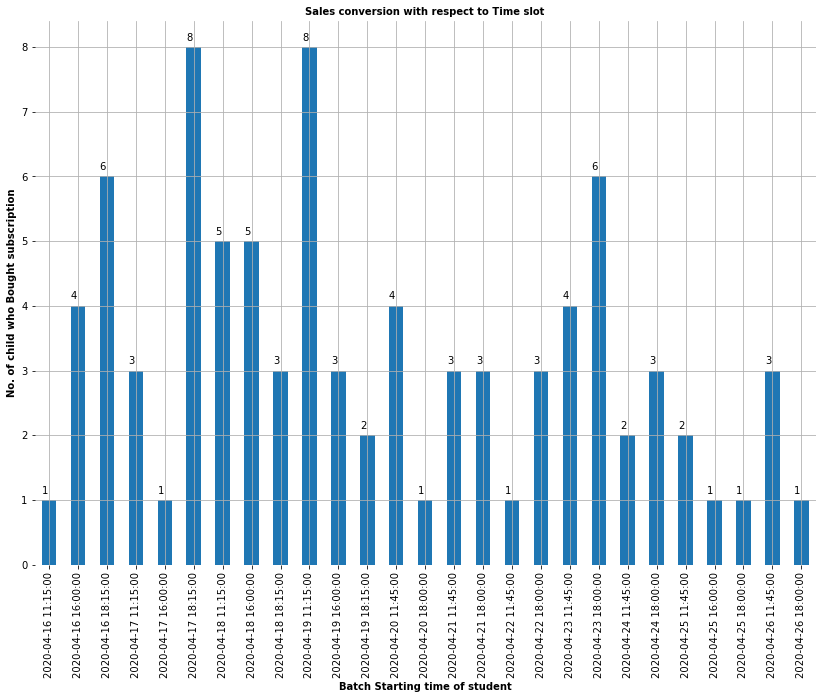

In [277]:
plt.figure(figsize=(14,10))
ax2= gb2['sales'].plot(kind='bar')

plt.title("Sales conversion with respect to Time slot",fontweight = 'bold',fontsize = 10)

plt.xlabel("Batch Starting time of student",fontweight = 'bold',fontsize =10)
plt.ylabel("No. of child who Bought subscription",fontweight = 'bold',fontsize = 10)

"remove border of graph"
for spine in plt.gca().spines.values():
    spine.set_visible(False)

"add value on top of bar"
for p in ax2.patches:
    
    width,height = p.get_width(),p.get_height()
    #print(width,height)
    x,y = p.get_xy()
    ax2.annotate('{}'.format(height),(x,y+height+0.1))
    

plt.grid()
plt.show()

#### Groupby Practice

In [266]:
gb1=sheet1.groupby('source')

gb1.get_group("lastchance").set_index("Child name").head()



,phone,email_id,school,grade,batch_preferred,source,Submitted At
Child name,,,,,,,
CH_30001,911100221000,s2m_test_20001@tests2m.com,St.paul's school,Grade 2,"Afternoon Batch (4:00 - 4:45 PM), Evening Batc...",lastchance,2020-04-16 08:46:39
CH_30002,911100221001,s2m_test_20002@tests2m.com,K L E School haveri,Grade 4,"Evening Batch (6:15 - 7:00 PM), Morning Batch ...",lastchance,2020-04-16 08:47:55
CH_30003,911100221002,s2m_test_20003@tests2m.com,Delhu Public School Howrah,Grade 2,"Morning Batch (11:15 - 12:00 PM), Evening Batc...",lastchance,2020-04-16 08:47:59
CH_30004,911100221003,s2m_test_20004@tests2m.com,Bharathi vidya bhavans,Grade 2,"Evening Batch (6:15 - 7:00 PM), Afternoon Batc...",lastchance,2020-04-16 08:48:27
CH_30005,911100221004,s2m_test_20005@tests2m.com,Army public school Delhi cantt,Grade 4,"Evening Batch (6:15 - 7:00 PM), Afternoon Batc...",lastchance,2020-04-16 08:52:06


In [331]:
gb2 = sheet1.groupby(sheet1.source)

"Computed first of values within each group"
gb2.first().head()




,Child name,phone,email_id,school,grade,batch_preferred,Submitted At
source,,,,,,,
T1KRMSMS,CH_30340,911100221327,s2m_test_20329@tests2m.com,DPS MEGACITY,Grade 3,"Morning Batch (11:15 - 12:00 PM), Afternoon Ba...",2020-04-17 12:03:15
TEB11SMS,CH_30024,911100221024,s2m_test_20025@tests2m.com,SBOA school and junior college,Grade 1,"Morning Batch (11:15 - 12:00 PM), Afternoon Ba...",2020-04-16 10:34:24
TEB12SMS,CH_30027,911100221027,s2m_test_20028@tests2m.com,Kampala niketan,Grade 2,"Morning Batch (11:15 - 12:00 PM), Evening Batc...",2020-04-16 10:36:01
TEB2ASMS,CH_30219,911100221210,s2m_test_20212@tests2m.com,Don Bosco school,Grade 2,"Afternoon Batch (4:00 - 4:45 PM), Evening Batc...",2020-04-17 05:03:51
TEB2BSMS,CH_30228,911100221219,s2m_test_20221@tests2m.com,Kamala niketan school,Grade 3,"Morning Batch (11:15 - 12:00 PM), Evening Batc...",2020-04-17 05:06:03
